In [2]:
# x
# inputs
# targets
# W, b
# model
# squared loss
# one trraining step
# iterate
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
num_samples_per_class = 400
negative_samples = np.random.multivariate_normal(

    mean = [0,3],
    cov = [[1,0.5], [0.5, 1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5], [0.5, 1]],
    size=num_samples_per_class

)

In [7]:
inputs = np.vstack((negative_samples, positive_samples)).astype(float32)

In [9]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"),
                     np.ones((num_samples_per_class, 1), dtype = "float32")))

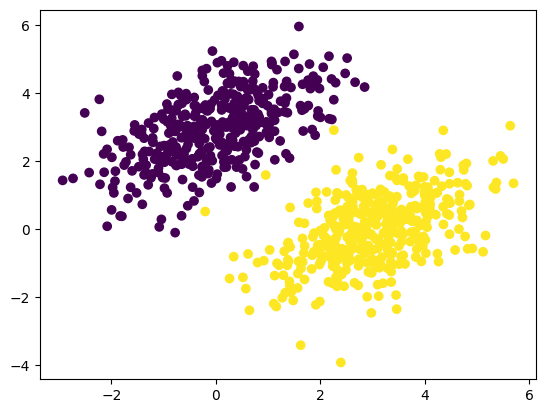

In [10]:
plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [11]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim, )))

In [12]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.14698017],
       [0.93948567]], dtype=float32)>

In [13]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [14]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [18]:
def squared_error_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [19]:
learning_rate = 0.1

def one_training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = squared_error_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate * grad_loss_wrt_W)
  b.assign_sub(learning_rate * grad_loss_wrt_b)

  return loss

In [20]:
for step in range(40):
  loss = one_training_step(inputs, targets)
  print(f"loss at step: {step}: {loss:.4f}")

loss at step: 0: 0.3860
loss at step: 1: 0.1613
loss at step: 2: 0.1241
loss at step: 3: 0.1117
loss at step: 4: 0.1032
loss at step: 5: 0.0959
loss at step: 6: 0.0892
loss at step: 7: 0.0833
loss at step: 8: 0.0778
loss at step: 9: 0.0729
loss at step: 10: 0.0685
loss at step: 11: 0.0644
loss at step: 12: 0.0608
loss at step: 13: 0.0575
loss at step: 14: 0.0544
loss at step: 15: 0.0517
loss at step: 16: 0.0492
loss at step: 17: 0.0470
loss at step: 18: 0.0450
loss at step: 19: 0.0431
loss at step: 20: 0.0415
loss at step: 21: 0.0399
loss at step: 22: 0.0386
loss at step: 23: 0.0373
loss at step: 24: 0.0362
loss at step: 25: 0.0352
loss at step: 26: 0.0343
loss at step: 27: 0.0334
loss at step: 28: 0.0327
loss at step: 29: 0.0320
loss at step: 30: 0.0313
loss at step: 31: 0.0308
loss at step: 32: 0.0303
loss at step: 33: 0.0298
loss at step: 34: 0.0294
loss at step: 35: 0.0290
loss at step: 36: 0.0286
loss at step: 37: 0.0283
loss at step: 38: 0.0280
loss at step: 39: 0.0278


(800, 1)


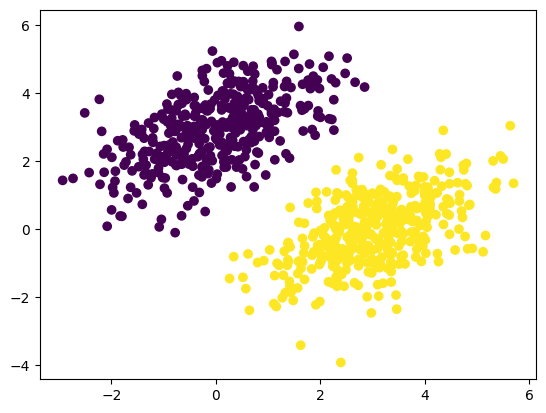

In [23]:
predictions = model(inputs)
print(predictions.shape)
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:, 0] > 0.5)
plt.show()

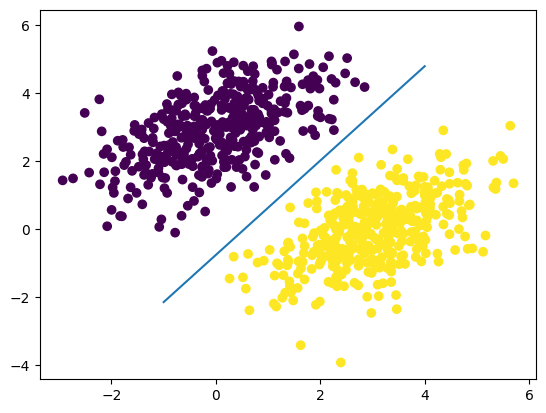

In [24]:
x = np.linspace(-1, 4, 100)
y = -W[0]/W[1] * x + (0.5-b)/ W[1]
plt.plot(x, y)
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:, 0] > 0.5)
plt.show()